In [ ]:
pip install --upgrade keras

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 6.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 311.2/311.2 kB 9.0 MB/s eta 0:00:00
  Attempting uninstall: keras
    Found existing installation: keras 2.15.0
    Uninstalling keras-2.15.0:
      Successfully uninstalled keras-2.15.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.15.0 requires keras<2.16,>=2.15.0, but you have keras 3.3.3 which is incompatible.


In [ ]:
import keras
from keras import layers
from keras import ops


import os
import numpy as np
from glob import glob
import cv2
from scipy.io import loadmat
import matplotlib.pyplot as plt
import tensorflow as tf
from keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, EarlyStopping
# For data preprocessing
from tensorflow import image as tf_image
from tensorflow import data as tf_data
from tensorflow import io as tf_io
from keras.utils import plot_model

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# # Loading the Colormap
# colormap = np.array(
#     [
#         [255, 255, 0],  # Black
#         [255, 100, 0],
#         [255, 165, 0], # Green
#         [0, 0, 255],  # Blue
#         [0, 50, 0],
#         [0, 0, 0],
#         [0, 0, 0],
#         [0, 0, 0],
#         [0, 0, 0],
#         [0, 0, 0],
#         [0, 0, 0],
#         [0, 0, 0],
#         [0, 0, 0],
#         [0, 0, 0],
#         [0, 0, 0],
#         [0, 0, 0],
#         [0, 0, 0],
#         [0, 0, 0],
#         [0, 0, 0],
#         [0, 0, 0],# Yellow
#     ]
# )
# colormap = colormap * 100
# colormap = colormap.astype(np.uint8)


# def infer(model, image_tensor):
#     predictions = model.predict(np.expand_dims((image_tensor), axis=0))
#     predictions = np.squeeze(predictions)
#     predictions = np.argmax(predictions, axis=2)
#     return predictions


# def decode_segmentation_masks(mask, colormap, n_classes):
#     r = np.zeros_like(mask).astype(np.uint8)
#     g = np.zeros_like(mask).astype(np.uint8)
#     b = np.zeros_like(mask).astype(np.uint8)
#     for l in range(0, n_classes):
#         idx = mask == l
#         r[idx] = colormap[l, 0]
#         g[idx] = colormap[l, 1]
#         b[idx] = colormap[l, 2]
#     rgb = np.stack([r, g, b], axis=2)
#     return rgb


# def get_overlay(image, colored_mask):
#     image = keras.utils.array_to_img(image)
#     image = np.array(image).astype(np.uint8)
#     overlay = cv2.addWeighted(image, 0.35, colored_mask, 0.65, 0)
#     return overlay


# def plot_samples_matplotlib(display_list, figsize=(5, 3)):
#     _, axes = plt.subplots(nrows=1, ncols=len(display_list), figsize=figsize)
#     for i in range(len(display_list)):
#         if display_list[i].shape[-1] == 3:
#             axes[i].imshow(keras.utils.array_to_img(display_list[i]))
#         else:
#             axes[i].imshow(display_list[i])
#     plt.show()


# import os

# def plot_predictions(images_list, colormap, model, save_path='/content/drive/MyDrive/inferences/'):
#     # Create directory if it doesn't exist
#     if not os.path.exists(save_path):
#         os.makedirs(save_path)

#     count = 1  # Initialize counter for sequential filenames

#     for image_file in images_list:
#         image_tensor = read_image(image_file)
#         prediction_mask = infer(image_tensor=image_tensor, model=model)
#         prediction_colormap = decode_segmentation_masks(prediction_mask, colormap, 20)
#         overlay = get_overlay(image_tensor, prediction_colormap)

#         # Display images using matplotlib
#         plot_samples_matplotlib(
#             [image_tensor, overlay, prediction_colormap], figsize=(18, 14)
#         )

#         # Save images
#         save_file_path = os.path.join(save_path, f'{count}.jpg')
#         cv2.imwrite(save_file_path, cv2.cvtColor(overlay, cv2.COLOR_RGB2BGR))
#         print(f"Saved image {count} to {save_file_path}")

#         count += 1  # Increment counter for next filename


In [ ]:
# from PIL import Image
# image_path="/content/drive/MyDrive/Dataset/maskfinal/044.png"
# from PIL import Image
# import numpy as np

# try:
#     # Open the image in grayscale mode
#     img = Image.open(image_path).convert('L')
# except FileNotFoundError:
#     print(f"Error: Image file not found at {image_path}")


#   # Convert the image data to a NumPy array
# img_resized = img.resize((50, 50))
# image_array = np.array(img)

#   # Find the unique values and their counts
# unique_values, counts = np.unique(image_array, return_counts=True)

#   # Print the results
# print("Unique pixel values and their occurrences:")
# for value, count in zip(unique_values, counts):
#     print(f"Value {value}: {count} occurrences")




In [ ]:
# import cv2
# import numpy as np

# def visualize_grayscale_mapping(input_path, output_path):
#     """
#     Reads a grayscale image, maps each pixel value to a specific color, and saves the colored image.

#     Args:
#         input_path (str): Path to the grayscale image file.
#         output_path (str): Path to save the colored image.
#     """

#     img = cv2.imread(input_path, cv2.IMREAD_GRAYSCALE)  # Load as grayscale

#     # Create a dictionary for color mapping
#     color_map = {
#         0: (0, 0, 0),    # Black
#         2: (0, 0, 255),  # Red
#         1: (255, 0, 0),  # Green
#         3: (255, 0, 0),  # Blue
#         4: (255, 0, 255) # Purple
#     }

#     # Create a new image to hold the colored result
#     colored_img = np.zeros((img.shape[0], img.shape[1], 3), dtype=np.uint8)

#     # Loop through each pixel and assign color based on value
#     for y in range(img.shape[0]):
#         for x in range(img.shape[1]):
#             pixel_value = img[y, x]
#             colored_img[y, x] = color_map.get(pixel_value, (255, 255, 255))  # Assign color from the map, default to white

#     # Save the colored image
#     cv2.imwrite(output_path, colored_img)

# # Example usage
# input_path = "/content/drive/MyDrive/Dataset/maskfinal/109.png"  # Replace with your image path
# output_path = "output.jpg"  # Replace with your desired output path
# visualize_grayscale_mapping(input_path, output_path)


[[3 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [3 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
Unique Values: [0 3]


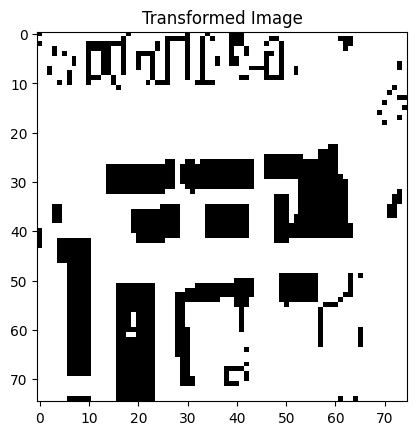

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

# Step 1: Read the image and convert it into a NumPy array

image_path = '/content/drive/MyDrive/Dataset/maskfinal/109.png'
img = Image.open(image_path).convert('L')
img_resized = img.resize((75, 75))
image_array = np.array(img_resized)

# Step 2: Transform pixel values according to the specification
transformed_arrayx = np.where((image_array == 1), 3, 0)
transformed_array_2 = np.where(image_array == 0, 0, np.where(image_array == 1, 2, 1))


# Step 3: Print the array and show unique values
print(transformed_arrayx)
unique_values = np.unique(transformed_arrayx)
print("Unique Values:", unique_values)

# Step 4: Plot the array
plt.imshow(transformed_arrayx, cmap='binary')
plt.title('Transformed Image')
plt.show()


(75, 75)
[(0, 0)]
ok
Cluster center found at: (5.671532846715328, 11.10948905109489)
hiiiiiiii


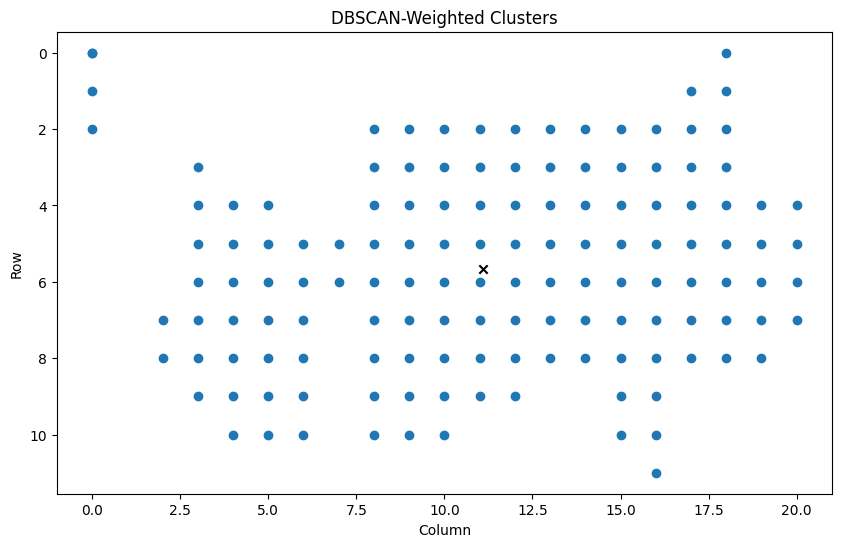

[(0, 30)]
ok
Cluster center found at: (4.916, 35.384)
hiiiiiiii


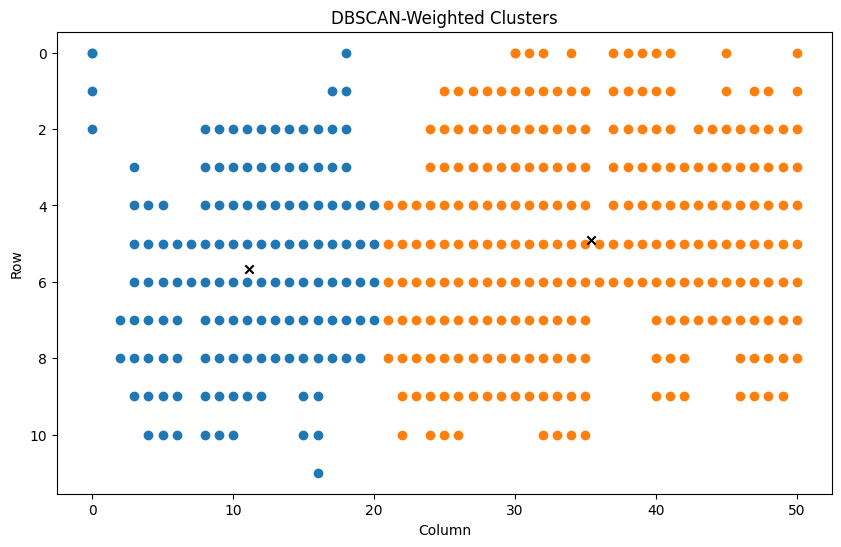

[(0, 51)]
ok
[(5, 74)]
ok
[(25, 46)]
ok
Cluster center found at: (28.02285714285714, 43.2)
hiiiiiiii


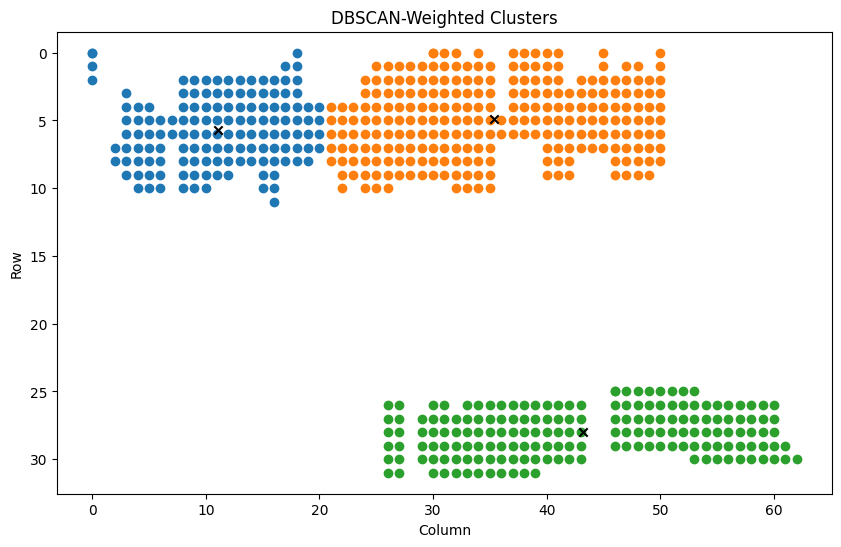

[(27, 14)]
ok
Cluster center found at: (36.10982658959538, 16.161849710982658)
hiiiiiiii


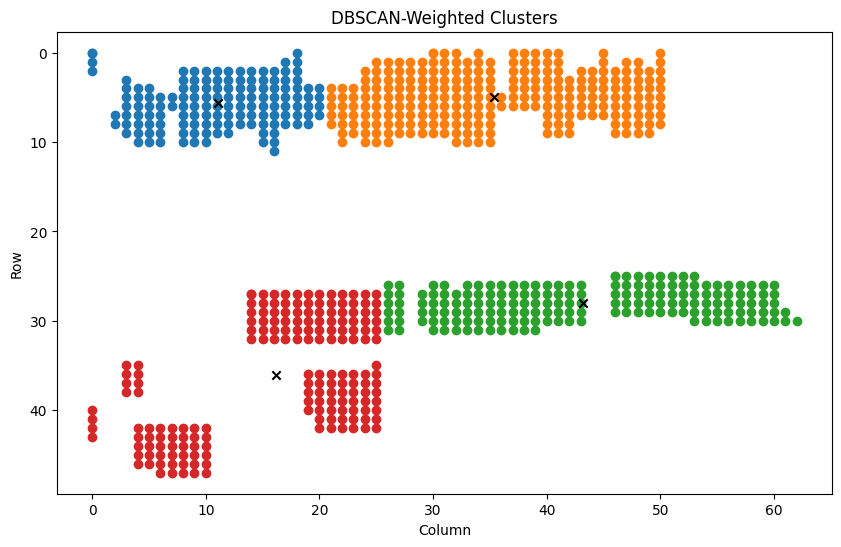

[(32, 73)]
ok
Cluster center found at: (45.7, 62.625)
hiiiiiiii


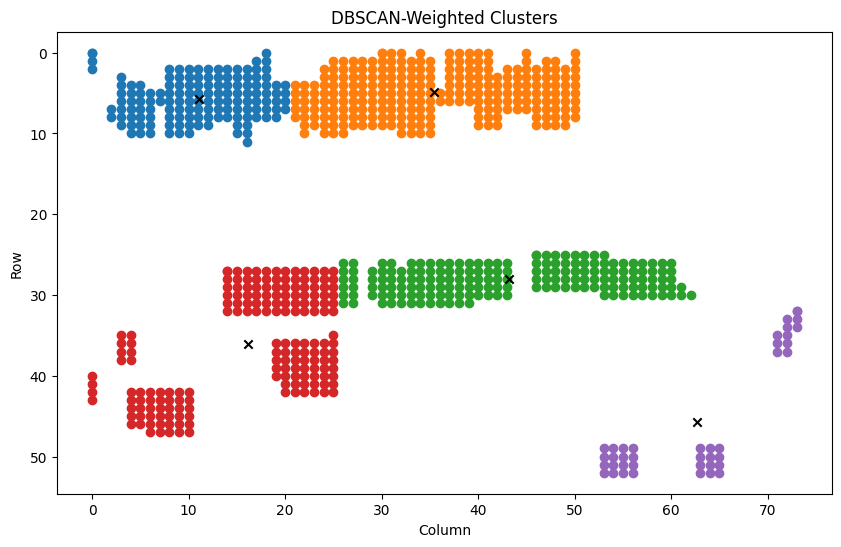

[(48, 6)]
ok
Cluster center found at: (56.02857142857143, 14.142857142857142)
hiiiiiiii


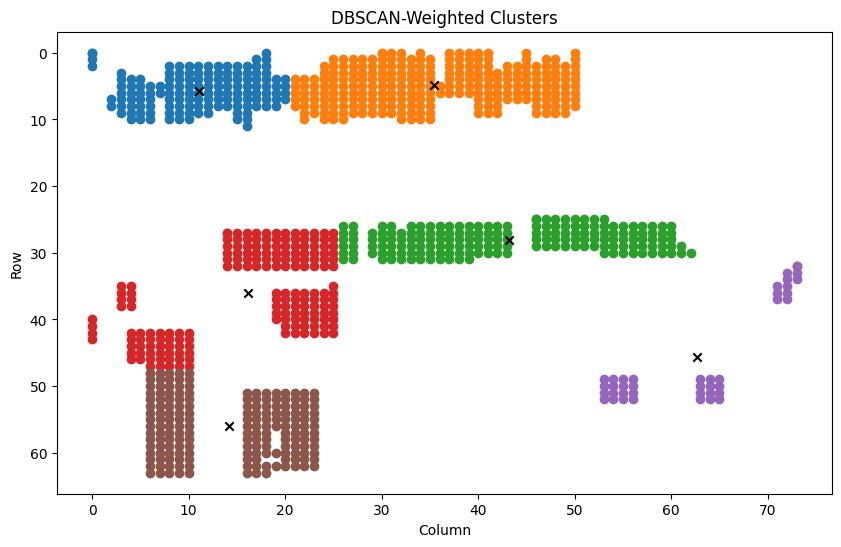

[(49, 49)]
ok
Cluster center found at: (56.12206572769953, 49.009389671361504)
hiiiiiiii


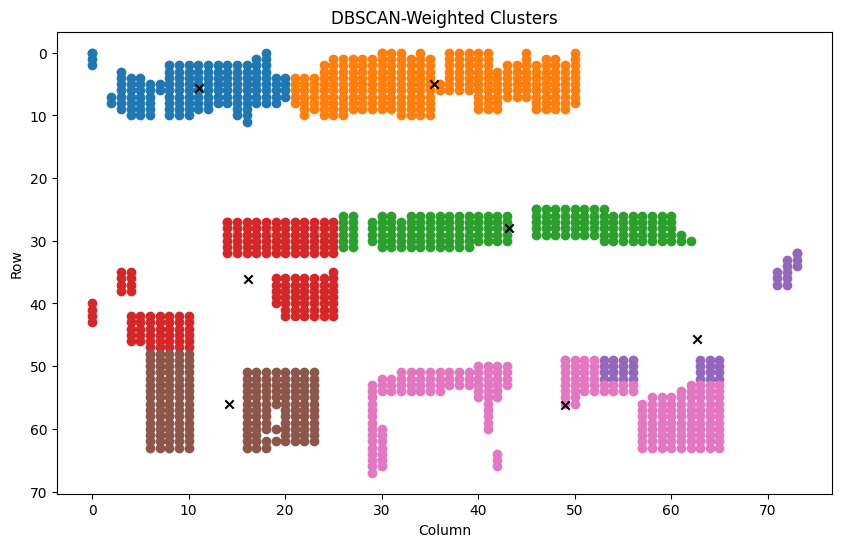

[(53, 28)]
ok
Cluster center found at: (68.35211267605634, 23.887323943661972)
hiiiiiiii


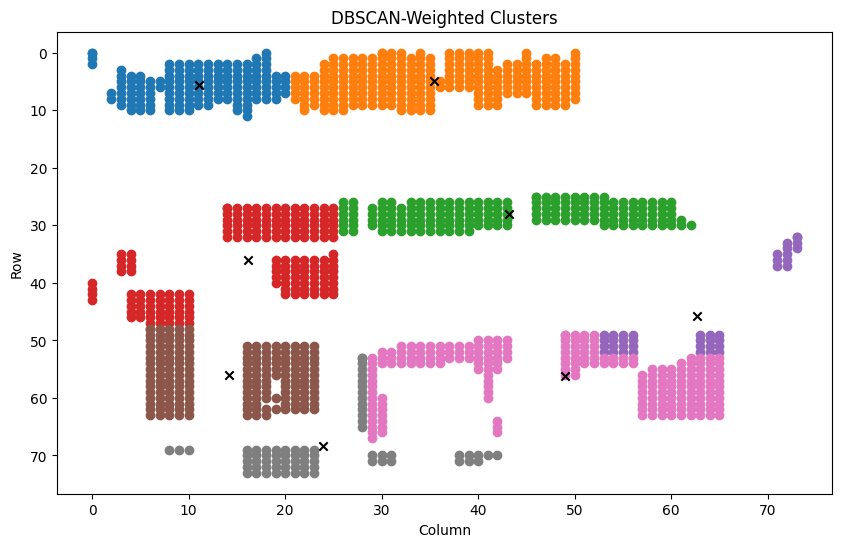

[(69, 6)]
ok
Cluster center found at: (73.0625, 13.4375)
hiiiiiiii


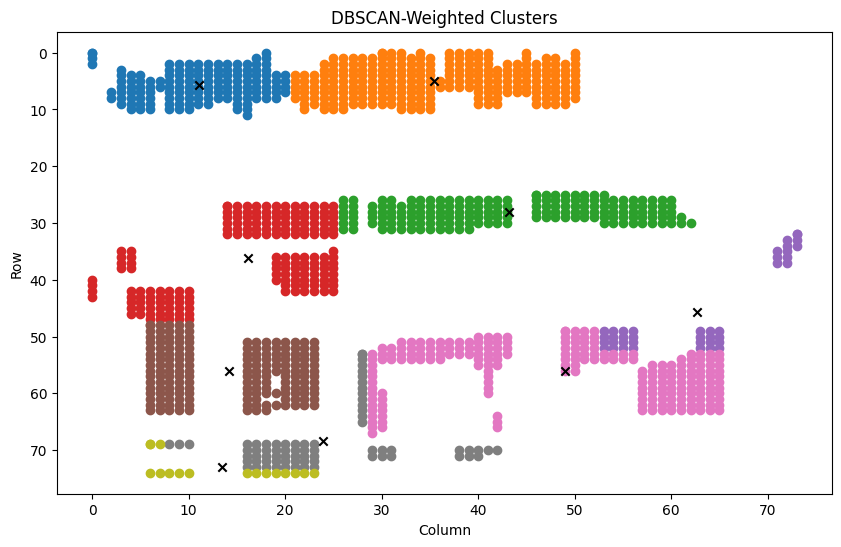

[(74, 61)]
ok


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import euclidean_distances

def DBSCAN_WEIGHTED(X, epsilon, MinPts, MaxWt):
    # Initialize clusters as an empty list
    clusters = []
    centers=[]
    # Iterate over all points in the image
    for i in range(X.shape[0]):
        for j in range(X.shape[1]):
            if X[i][j] == 0:
                continue

            # Initialize sum and density
            sum_val = X[i][j]
            density = X[i][j]

            # Initialize cluster for the current point
            cluster = [(i, j)]
            print(cluster)

            # Define function to find neighbors
            def neighbors(point):
                x, y = point
                for dx in range(-epsilon, epsilon + 1):
                   for dy in range(-epsilon, epsilon + 1):
                        if dx == 0 and dy == 0:
                            continue
                        nx, ny = x + dx, y + dy
                        if 0 <= nx < X.shape[0] and 0 <= ny < X.shape[1] and X[nx][ny] != 0:
                            yield (nx, ny)

            # Function to calculate density
            def calc_density(neighbour, point):
                distance = euclidean_distances([point], [neighbour])[0][0]
                return X[neighbour[0]][neighbour[1]] / (distance ** 2 + 1)

            # Function to expand cluster
            def expand_cluster(point):
                nonlocal sum_val, density
                cluster.append(point)
                sum_val += X[point[0]][point[1]]
                density += calc_density(point, (i, j))
                X[point[0]][point[1]] = 0
                for neighbour in neighbors(point):
                    sum_val += X[neighbour[0]][neighbour[1]]
                    density += calc_density(neighbour, (i, j))
                    X[neighbour[0]][neighbour[1]] = 0
                    if sum_val <= MaxWt:
                        cluster.append(neighbour)
                print("ok")
            # Expand cluster iteratively
            expand_cluster((i, j))

            # If density is greater than or equal to MinPts, add cluster to list of clusters
            if density >= MinPts:
                center = (sum([p[0] for p in cluster]) / len(cluster), sum([p[1] for p in cluster]) / len(cluster))
                print(f"Cluster center found at: {center}")
                clusters.append(cluster)
                print("hiiiiiiii")
                centers.append(center)
                # Plot all points processed up to this iteration
                plot_points(X, clusters, centers)

    return clusters,centers

def plot_points(X, clusters,centers):
    plt.figure(figsize=(10, 6))
    for cluster in clusters:
        cluster_points = np.array(cluster)
        plt.scatter(cluster_points[:, 1], cluster_points[:, 0])

    centers = np.array(centers)
    plt.scatter(centers[:, 1], centers[:, 0], c='black', marker='x', label='Cluster Centers')
    plt.gca().invert_yaxis()
    plt.xlabel('Column')
    plt.ylabel('Row')
    plt.title('DBSCAN-Weighted Clusters')
    plt.show()

# Load the image and resize it to 50x50 pixels
try:
    from PIL import Image
    image_path = '/content/drive/MyDrive/Dataset/maskfinal/109.png'
    img = Image.open(image_path).convert('L')
    img_resized = img.resize((75,75))
    image_array = np.array(img_resized)
    print(image_array.shape)
except FileNotFoundError:
    print(f"Error: Image file not found at {image_path}")
    exit()

# Example usage:
epsilon = 20  # Radius for neighborhood
MinPts = 5  # Minimum number of points in a cluster
MaxWt = 350  # Maximum weight allowed for a cluster

# clusters,centersx = DBSCAN_WEIGHTED(image_array, epsilon, MinPts, MaxWt)
clusters,centersx = DBSCAN_WEIGHTED(transformed_array_2, epsilon, MinPts, MaxWt)


In [ ]:
# import numpy as np
# import matplotlib.pyplot as plt
# from sklearn.metrics.pairwise import euclidean_distances

# def DBSCAN_WEIGHTED(X, epsilon, MinPts, MaxWt):
#     # Initialize clusters as an empty list
#     clusters = []
#     centers=[]
#     # Iterate over all points in the image
#     for i in range(X.shape[0]):
#         for j in range(X.shape[1]):
#             if X[i][j] == 0:
#                 continue

#             # Initialize sum and density
#             sum_val = X[i][j]
#             density = X[i][j]

#             # Initialize cluster for the current point
#             cluster = [(i, j)]
#             print(cluster)

#             # Define function to find neighbors
#             def neighbors(point):
#                 x, y = point
#                 for dx in range(-epsilon, epsilon + 1):
#                    for dy in range(-epsilon, epsilon + 1):
#                         if dx == 0 and dy == 0:
#                             continue
#                         nx, ny = x + dx, y + dy
#                         if 0 <= nx < X.shape[0] and 0 <= ny < X.shape[1] and X[nx][ny] != 0:
#                             yield (nx, ny)

#             # Function to calculate density
#             def calc_density(neighbour, point):
#                 distance = euclidean_distances([point], [neighbour])[0][0]
#                 return X[neighbour[0]][neighbour[1]] / (distance ** 2 + 1)

#             # Function to expand cluster
#             def expand_cluster(point):
#                 nonlocal sum_val, density
#                 cluster.append(point)
#                 sum_val += X[point[0]][point[1]]
#                 density += calc_density(point, (i, j))
#                 X[point[0]][point[1]] = 0
#                 for neighbour in neighbors(point):
#                     sum_val += X[neighbour[0]][neighbour[1]]
#                     density += calc_density(neighbour, (i, j))
#                     X[neighbour[0]][neighbour[1]] = 0
#                     if sum_val <= MaxWt:
#                         cluster.append(neighbour)
#                 print("ok")
#             # Expand cluster iteratively
#             expand_cluster((i, j))

#             # If density is greater than or equal to MinPts, add cluster to list of clusters
#             if density >= MinPts:
#                 center = (sum([p[0] for p in cluster]) / len(cluster), sum([p[1] for p in cluster]) / len(cluster))
#                 print(f"Cluster center found at: {center}")
#                 clusters.append(cluster)
#                 print("hiiiiiiii")
#                 centers.append(center)
#                 # Plot all points processed up to this iteration
#                 plot_points(X, clusters, centers)

#     return clusters,centers

# def plot_points(X, clusters,centers):
#     plt.figure(figsize=(10, 6))
#     for cluster in clusters:
#         cluster_points = np.array(cluster)
#         plt.scatter(cluster_points[:, 1], cluster_points[:, 0])

#     centers = np.array(centers)
#     plt.scatter(centers[:, 1], centers[:, 0], c='black', marker='x', label='Cluster Centers')
#     plt.gca().invert_yaxis()
#     plt.xlabel('Column')
#     plt.ylabel('Row')
#     plt.title('DBSCAN-Weighted Clusters')
#     plt.show()

# # Load the image and resize it to 50x50 pixels
# try:
#     from PIL import Image
#     image_path = '/content/drive/MyDrive/Dataset/maskfinal/109.png'
#     img = Image.open(image_path).convert('L')
#     img_resized = img.resize((75,75))
#     image_array = np.array(img_resized)
#     print(image_array.shape)
# except FileNotFoundError:
#     print(f"Error: Image file not found at {image_path}")
#     exit()

# # Example usage:
# epsilon = 20  # Radius for neighborhood
# MinPts = 5  # Minimum number of points in a cluster
# MaxWt = 350  # Maximum weight allowed for a cluster

# # clusters,centersx = DBSCAN_WEIGHTED(image_array, epsilon, MinPts, MaxWt)
# clusters,centersx = DBSCAN_WEIGHTED(transformed_array_2, epsilon, MinPts, MaxWt)


In [ ]:
centers=centersx

In [ ]:
centers

[(5.671532846715328, 11.10948905109489),
 (4.916, 35.384),
 (28.02285714285714, 43.2),
 (36.10982658959538, 16.161849710982658),
 (45.7, 62.625),
 (56.02857142857143, 14.142857142857142),
 (56.12206572769953, 49.009389671361504),
 (68.35211267605634, 23.887323943661972),
 (73.0625, 13.4375)]

In [ ]:
print(centersx)

[(4.48, 24.792), (4.4471544715447155, 41.552845528455286), (3.5925925925925926, 53.18518518518518), (12.777777777777779, 72.28888888888889), (31.31, 55.87), (31.475555555555555, 28.36888888888889), (48.95789473684211, 56.03157894736842), (56.50769230769231, 36.723076923076924), (59.0, 61.01234567901235), (64.81699346405229, 14.294117647058824), (68.95, 40.05)]


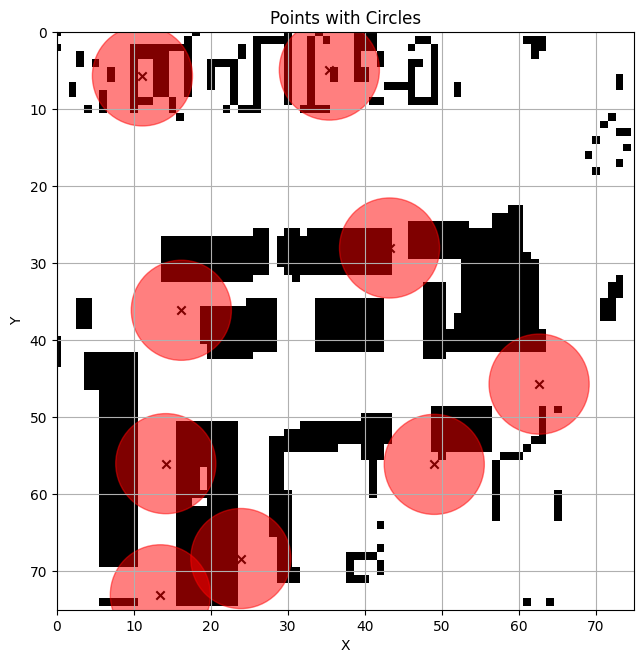

In [ ]:
# import numpy as np
# import matplotlib.pyplot as plt
# centers = np.array(centersx)
# # Create a 75x75 plot
# plt.figure(figsize=(7.5, 7.5))

# # Plot the points
# plt.scatter(centers[:, 1], centers[:, 0], c='black', marker='x', label='Cluster Centers')

# # Plot circles around each point
# for center in centers:
#     circle = plt.Circle((center[1], center[0]), radius=6.5, color='red',  alpha=0.5, fill=True)
#     plt.gca().add_patch(circle)
# plt.imshow(transformed_arrayx, cmap='binary')
# plt.title('Transformed Image')

# # Set plot limits and labels
# plt.xlim(0, 75)
# plt.ylim(0, 75)
# plt.xlabel('X')
# plt.ylabel('Y')
# plt.title('Points with Circles')
# plt.gca().invert_yaxis()
# # Add legend


# # Show plot
# plt.grid(True)
# plt.show()


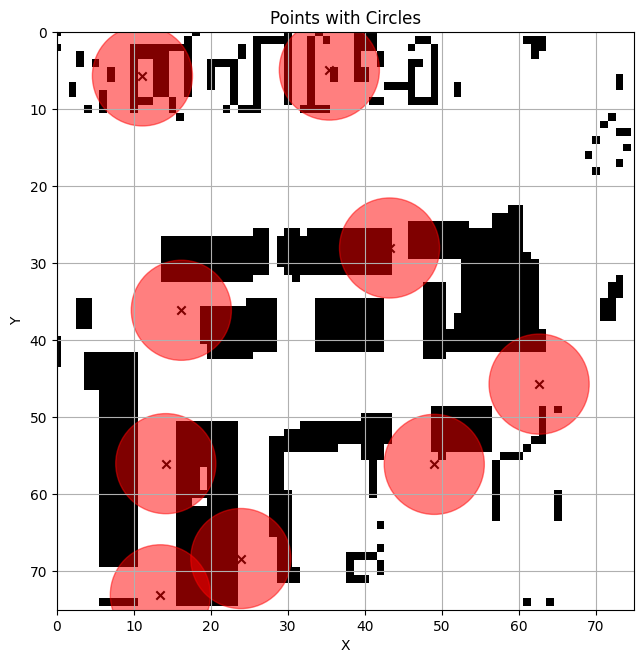

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
centers = np.array(centersx)
# Create a 75x75 plot
plt.figure(figsize=(7.5, 7.5))

# Plot the points
plt.scatter(centers[:, 1], centers[:, 0], c='black', marker='x', label='Cluster Centers')

# Plot circles around each point
for center in centers:
    circle = plt.Circle((center[1], center[0]), radius=6.5, color='red',  alpha=0.5, fill=True)
    plt.gca().add_patch(circle)
plt.imshow(transformed_arrayx, cmap='binary')
plt.title('Transformed Image')

# Set plot limits and labels
plt.xlim(0, 75)
plt.ylim(0, 75)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Points with Circles')
plt.gca().invert_yaxis()
# Add legend


# Show plot
plt.grid(True)
plt.show()


In [ ]:
print(centers)

[[ 5.67153285 11.10948905]
 [ 4.916      35.384     ]
 [28.02285714 43.2       ]
 [36.10982659 16.16184971]
 [45.7        62.625     ]
 [56.02857143 14.14285714]
 [56.12206573 49.00938967]
 [68.35211268 23.88732394]
 [73.0625     13.4375    ]]


In [ ]:
# import numpy as np

# class UAVEnvironment:
#     def _init_(self, map_size=(10, 10), target=(8, 8), obstacles=[]):
#         self.map_size = map_size
#         self.target = target
#         self.obstacles = obstacles
#         self.state = (0, 0)  # Initial state
#         self.done = False

#     def reset(self):
#         self.state = (0, 0)  # Reset to initial state
#         self.done = False
#         return self.state

#     def step(self, action):
#         if self.done:
#             raise Exception("Episode is done. Please reset the environment.")

#         if action == 0:  # Move Up
#             next_state = (self.state[0], max(0, self.state[1] - 1))
#         elif action == 1:  # Move Down
#             next_state = (self.state[0], min(self.map_size[1] - 1, self.state[1] + 1))
#         elif action == 2:  # Move Left
#             next_state = (max(0, self.state[0] - 1), self.state[1])
#         elif action == 3:  # Move Right
#             next_state = (min(self.map_size[0] - 1, self.state[0] + 1), self.state[1])
#         else:
#             raise ValueError("Invalid action.")

#         if next_state in self.obstacles:
#             reward = -10  # Penalty for hitting an obstacle
#         elif next_state == self.target:
#             reward = 100  # Reward for reaching the target
#             self.done = True
#         else:
#             reward = -1  # Penalty for each step

#         self.state = next_state
#         return next_state, reward, self.done

# class DuelingQLearningAgent:
#     def _init_(self, env, learning_rate=0.1, discount_factor=0.99, epsilon=0.1):
#         self.env = env
#         self.learning_rate = learning_rate
#         self.discount_factor = discount_factor
#         self.epsilon = epsilon
#         self.q_values = np.zeros((env.map_size[0], env.map_size[1], 4))  # 4 actions: Up, Down, Left, Right
#         self.state_values = np.zeros((env.map_size[0], env.map_size[1]))
#         self.advantages = np.zeros((env.map_size[0], env.map_size[1], 4))

#     def choose_action(self, state):
#         if np.random.rand() < self.epsilon:
#             return np.random.choice(4)  # Exploration
#         else:
#             return np.argmax(self.q_values[state])

#     def update_q_values(self, state, action, reward, next_state):
#         td_target = reward + self.discount_factor * np.max(self.q_values[next_state])
#         td_error = td_target - self.q_values[state][action]

#         self.q_values[state][action] += self.learning_rate * td_error

#     def update_state_values_and_advantages(self, state, action, reward, next_state):
#         next_action_values = self.q_values[next_state]
#         best_next_action = np.argmax(next_action_values)

#         self.state_values[state] += self.learning_rate * (reward + self.discount_factor * next_action_values[best_next_action] - self.state_values[state])
#         self.advantages[state][action] = self.q_values[state][action] - self.state_values[state]

#     def train(self, episodes):
#         for episode in range(episodes):
#             state = self.env.reset()
#             done = False
#             total_reward = 0

#             while not done:
#                 action = self.choose_action(state)
#                 next_state, reward, done = self.env.step(action)

#                 self.update_q_values(state, action, reward, next_state)
#                 self.update_state_values_and_advantages(state, action, reward, next_state)

#                 state = next_state
#                 total_reward += reward

#             print(f"Episode {episode + 1}: Total Reward = {total_reward}")


# import matplotlib.pyplot as plt

# def visualize_trajectory(env, agent, episodes, optimal_trajectory=None):
#     fig, ax = plt.subplots()

#     for episode in range(episodes):
#         state = env.reset()
#         trajectory = [state]

#         done = False
#         total_reward = 0

#         while not done:
#             action = agent.choose_action(state)
#             next_state, reward, done = env.step(action)

#             trajectory.append(next_state)

#             state = next_state
#             total_reward += reward

#         trajectory = np.array(trajectory)
#         ax.plot(trajectory[:, 0], trajectory[:, 1], label=f"Episode {episode + 1}")

#     ax.scatter(env.target[0], env.target[1], color='red', label='Target')
#     ax.scatter([o[0] for o in env.obstacles], [o[1] for o in env.obstacles], color='black', label='Obstacle')

#     if optimal_trajectory is not None:
#         ax.plot(optimal_trajectory[:, 0], optimal_trajectory[:, 1], color='green', linestyle='--', label='Optimal')

#     ax.set_title('UAV Trajectory Planning')
#     ax.set_xlabel('X')
#     ax.set_ylabel('Y')
#     plt.grid(True)
#     plt.show()

# def visualize_optimal_trajectory(env, optimal_trajectory):
#     optimal_trajectory = np.array(optimal_trajectory)
#     plt.figure()
#     plt.plot(optimal_trajectory[:, 0], optimal_trajectory[:, 1], color='green', linestyle='--', label='Optimal')
#     plt.scatter(env.target[0], env.target[1], color='red', label='Target')
#     plt.scatter([o[0] for o in env.obstacles], [o[1] for o in env.obstacles], color='black', label='Obstacle')
#     plt.title('Optimal UAV Trajectory')
#     plt.xlabel('X')
#     plt.ylabel('Y')
#     plt.legend()
#     plt.grid(True)
#     plt.show()


# env = UAVEnvironment(map_size=(10, 10), target=(8, 8), obstacles=[(3, 3), (3, 4), (3, 5), (5, 6), (7, 4)])
# agent = DuelingQLearningAgent(env)
# agent.train(episodes=250)
# visualize_trajectory(env, agent, episodes=250)  # Visualize trajectory for 5 episodes

TypeError: UAVEnvironment() takes no arguments

In [ ]:
import numpy as np
import random
from collections import deque
from keras.models import Sequential
from keras.layers import Dense


# Define the agent
class DQNAgent:
    def __init__(self, state_size, action_size):
        self.state_size = state_size
        self.action_size = action_size
        self.memory = deque(maxlen=2000)
        self.gamma = 0.95
        self.epsilon = 1.0
        self.epsilon_min = 0.01
        self.epsilon_decay = 0.995
        self.learning_rate = 0.001
        self.model = self._build_model()

    def _build_model(self):
        model = Sequential()
        model.add(Dense(64, input_dim=self.state_size, activation='relu'))
        model.add(Dense(64, activation='relu'))
        model.add(Dense(self.action_size, activation='linear'))
        model.compile(loss='mse', optimizer='adam')
        return model

    def remember(self, state, action, reward, next_state, done):
      state = np.reshape(state, [1, self.state_size])
      next_state = np.reshape(next_state, [1, self.state_size])
      self.memory.append((state, action, reward, next_state, done))

    def act(self, state):
      state = np.reshape(state, [1, self.state_size])
      if np.random.rand() <= self.epsilon:
          return random.randrange(self.action_size)
      act_values = self.model.predict(state)
      return np.argmax(act_values[0])


    def replay(self, batch_size):
        minibatch = random.sample(self.memory, batch_size)
        for i, (state, action, reward, next_state, done) in enumerate(minibatch):
            target = reward
            if not done:
                target = reward + self.gamma * np.amax(self.model.predict(next_state)[0])
            target_f = self.model.predict(state)
            target_f[0][action] = target
            self.model.fit(state, target_f, epochs=1, verbose=0)
        if self.epsilon > self.epsilon_min:
            self.epsilon *= self.epsilon_decay

# Define the environment
class Environment:
    def __init__(self, transformed_array, centers):
        self.transformed_array = transformed_array
        self.centers = centers
        self.state_size = transformed_array.shape[0] * transformed_array.shape[1]
        self.action_size = 4  # up, down, left, right

    def reset(self):
        self.current_state = np.zeros((self.state_size,))
        self.current_position = [0, 0]
        return self.current_state

    def step(self, action):
        x, y = self.current_position
        if action == 0:  # up
            y -= 1
        elif action == 1:  # down
            y += 1
        elif action == 2:  # left
            x -= 1
        elif action == 3:  # right
            x += 1

        if x < 0 or x >= self.transformed_array.shape[1] or y < 0 or y >= self.transformed_array.shape[0]:
            reward = -1
            done = True
        elif self.transformed_array[y, x] == 1:
            reward = -1
            done = True
        else:
            reward = 1
            done = False

        self.current_position = [x, y]
        self.current_state = self._get_state()

        if self.is_center():
            reward = 10

        return self.current_state, reward, done

    def _get_state(self):
        state = []
        for y in range(self.transformed_array.shape[0]):
            for x in range(self.transformed_array.shape[1]):
                state.append(self.transformed_array[y, x])
        return np.array(state)

    def is_center(self):
        x, y = self.current_position
        for center in self.centers:
            if center[0] == x and center[1] == y:
                return True
        return False

# Initialize the agent and environment
agent = DQNAgent(state_size=transformed_arrayx.shape[0] * transformed_arrayx.shape[1], action_size=4)
env = Environment(transformed_arrayx, centers)

# Train the agent
batch_size = 32
episodes = 1000
for episode in range(episodes):
    state = env.reset()
    done = False
    score = 0

    while not done:
        action = agent.act(state)
        next_state, reward, done = env.step(action)
        agent.remember(state, action, reward, next_state, done)
        state = next_state
        score += reward

    if episode % 10 == 0:
        print(f'Episode {episode}: Score {score}')

    if len(agent.memory) > batch_size:
        agent.replay(batch_size)

# Plot the final path
env.transformed_array = np.where(env.transformed_array == 0, 255, 0)
# for center in env.centers:
#     env.transformed_array[center[1], center[0]] = 0

for center in env.centers:
    env.transformed_array[np.array(center, dtype=int)] = 0
path = []
x, y = env.current_position
while (x, y) != (0, 0):
    path.append((x, y))
    if x > 0:
        x -= 1
    elif x < env.transformed_array.shape[1] - 1:
        x += 1
    elif y > 0:
        y -= 1
    elif y < env.transformed_array.shape[0] - 1:
        y += 1

for point in path:
    env.transformed_array[point[1], point[0]] = 0

import matplotlib.pyplot as plt
plt.imshow(env.transformed_array, cmap='gray')
for center in env.centers:
    plt.plot(center[0], center[1], 'cx')
plt.plot(path[::-1], 'k-')
plt.show()

Streaming output truncated to the last 5000 lines.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step

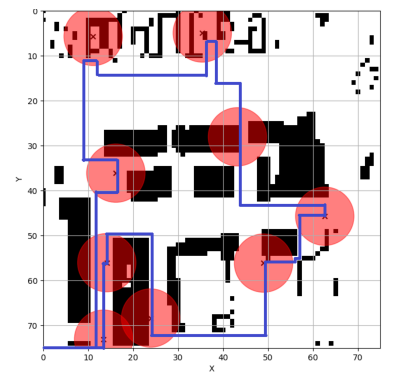